<a href="https://colab.research.google.com/github/pedroavellar/HouseRentML/blob/master/ArtigoAM_houserent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Olá! Este notebook foi utilizado para criar um artigo a ser enviado a disciplina de Aprendizado de Máquina do ICMC em 2020. 

Trabalhamos com o dataset com casas para alugar, no Brasil, disponível em https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

In [1]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/pedroavellar/HouseRentML/master/houses_to_rent_v2.csv'
raw_rent_data = pd.read_csv(uri)
raw_rent_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [0]:
raw_rent_data['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

Temos nosso dataset. Agora vamos limpá-lo, removendo duplicações, outliers e alterando variáveis para analisar.

In [0]:
rent_data = raw_rent_data.copy()

rent_data.drop_duplicates(inplace=True)

pet_friendly = {'acept': 1, 'not acept': 0}
furn_situation = {'furnished': 1, 'not furnished': 0}
city_map = {'Belo Horizonte': 1, 'Campinas': 2, 'Porto Alegre': 3, 'Rio de Janeiro': 4, 'São Paulo': 5}

rent_data.animal = [pet_friendly[item] for item in rent_data.animal]
rent_data.furniture = [furn_situation[item] for item in rent_data.furniture]
rent_data.city = [city_map[item] for item in rent_data.city]

In [0]:
len(rent_data.drop_duplicates())

10334

In [0]:
rent_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,5,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,5,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,3,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,3,51,2,1,0,2,1,0,270,1112,22,17,1421
4,5,25,1,1,0,1,0,0,0,800,25,11,836


In [0]:
rent_data.corr()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,1.000000,-0.011079,-0.050135,0.087097,0.046532,-0.014973,0.111979,0.003262,0.189965,0.037836,0.149550,0.064480
area,-0.011079,1.000000,0.191251,0.224388,0.191421,0.038712,0.009249,0.009085,0.178228,0.038453,0.185652,0.066849
rooms,-0.050135,0.191251,1.000000,0.730469,0.611634,0.165436,-0.075677,0.020466,0.536632,0.073539,0.560907,0.184519
bathroom,0.087097,0.224388,0.730469,1.000000,0.693952,0.114685,0.023140,0.057297,0.665625,0.108083,0.673771,0.261833
parking spaces,0.046532,0.191421,0.611634,0.693952,1.000000,0.124266,-0.003788,0.021100,0.573997,0.097159,0.593557,0.201245
animal,-0.014973,0.038712,0.165436,0.114685,0.124266,1.000000,-0.081020,-0.013845,0.064576,-0.004238,0.076535,0.004244
furniture,0.111979,0.009249,-0.075677,0.023140,-0.003788,-0.081020,1.000000,0.009767,0.166975,0.001147,0.144082,0.054942
hoa (R$),0.003262,0.009085,0.020466,0.057297,0.021100,-0.013845,0.009767,1.000000,0.052516,0.011267,0.042833,0.920770
rent amount (R$),0.189965,0.178228,0.536632,0.665625,0.573997,0.064576,0.166975,0.052516,1.000000,0.106679,0.987203,0.349045
property tax (R$),0.037836,0.038453,0.073539,0.108083,0.097159,-0.004238,0.001147,0.011267,0.106679,1.000000,0.104473,0.288968


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(rent_data)

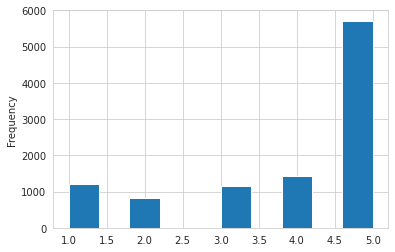

In [0]:
sns.set_style("whitegrid")
rent_data['city'].plot(kind='hist')

# Tem muito mais entradas de São Paulo

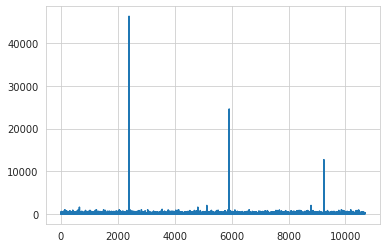

In [0]:
rent_data['area'].plot(kind='line')

Podemos ver que existem 3 casos que tem uma área muito maior do que o resto.
Vamos tirá-las para evitar que atrapalhem a análise 


In [0]:
#10334
rent_data = rent_data[rent_data['area'] < 5000]
#10331

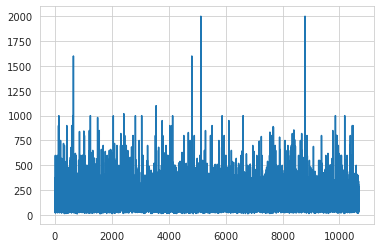

In [0]:
rent_data['area'].plot(kind='line')

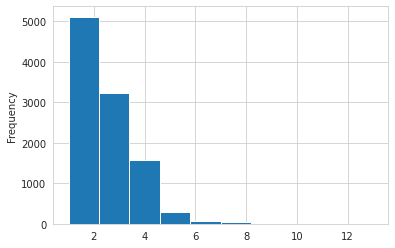

In [0]:
rent_data['rooms'].plot(kind='hist')

In [0]:
print(rent_data['animal'].value_counts())
print(rent_data['furniture'].value_counts())

1    8073
0    2258
Name: animal, dtype: int64
0    7817
1    2514
Name: furniture, dtype: int64


In [0]:
print(8073/(8073+2258))
print(2514/(7817+2514))

0.7814345174716871
0.24334527151292226


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,1,155,1,4,0,4,0,0,1117000,2790,64,38,1120000
415,5,488,4,3,3,-,1,0,14130,6400,1214,82,21820
1213,5,850,6,7,4,-,0,0,15000,13000,2465,196,30660
1444,3,42,1,1,0,10,1,0,32000,700,40,11,32750
2859,5,285,4,5,4,6,1,1,200000,20000,1834,254,222100
2928,4,35,1,1,0,1,1,1,81150,4500,9900,58,95610
5293,5,850,5,7,8,1,0,0,14000,4000,0,51,18050
6230,5,340,5,4,2,7,1,0,220000,12000,1000,153,233200


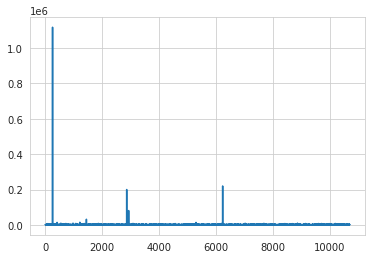

In [0]:
rent_data['hoa (R$)'].plot()
rent_data[rent_data['hoa (R$)'] > 10000]

Encontramos instâncias que parecem ter valores absurdos do suposto valor de condomínio (incluindo um superior a 1 milhão). Vamos tirar as instâncias com mais de 30000 pra ser minimamente plausível.

In [0]:
#10331
rent_data = rent_data[rent_data['hoa (R$)'] < 30000]
#10326

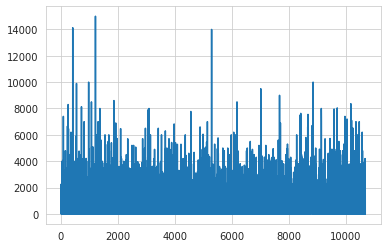

In [0]:
rent_data['hoa (R$)'].plot()

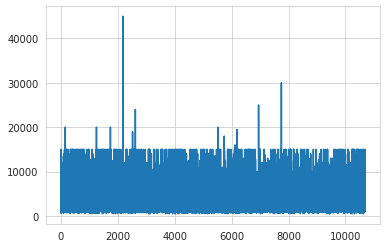

In [0]:
rent_data['rent amount (R$)'].plot()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1699,5,700,4,4,4,-,1,0,0,10000,21880,151,32040
6243,4,95,2,2,1,11,1,0,1024,3000,28120,39,32180
6645,5,42,1,2,1,6,0,0,690,2500,313700,32,316900


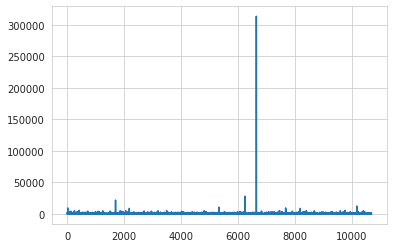

In [0]:
rent_data['property tax (R$)'].plot()
rent_data[rent_data['property tax (R$)'] > 20000]

Novamente vemos um grande outlier, dessa vez no IPTU. Se o cidadão está pagando 300000 de IPTU num apartamento de 1 quarto e 42 de área, ou tá em esquema ou tá sendo roubado pelo governo. Dá pra aceitar o de 21880 pelo tamanho da casa.

In [0]:
#10326
rent_data = rent_data[rent_data['property tax (R$)'] < 25000]
#10324

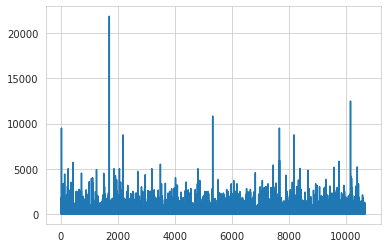

In [0]:
rent_data['property tax (R$)'].plot()

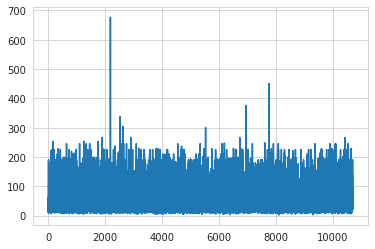

In [0]:
rent_data['fire insurance (R$)'].plot()

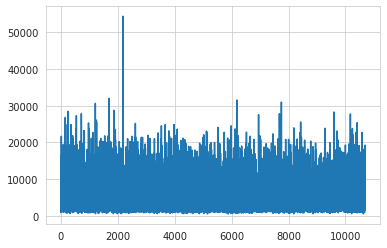

In [0]:
rent_data['total (R$)'].plot()

Pronto! Demos uma limpada no dataset. 

Agora vamos analisar se existe algum viés que pode influenciar nossos modelos.

In [0]:
rent_data.groupby(['city']).mean()

,area,rooms,bathroom,parking spaces,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,,,
1,174.768848,3.064623,2.433306,1.998343,0.744822,0.135046,562.243579,3739.141674,279.833471,54.801160,4636.316487
2,124.684915,2.360097,1.972019,1.572993,0.809002,0.135036,638.180049,2393.862530,151.215328,32.783455,3216.059611
3,105.464007,2.172593,1.745880,1.052905,0.856895,0.254987,469.463140,2350.898526,126.725065,36.665221,2983.770165
4,107.622113,2.277117,1.780966,0.762771,0.800560,0.281316,1057.217635,3326.419174,240.757873,43.693492,4668.101470
5,157.852792,2.594609,2.502363,1.919832,0.765272,0.269911,1114.277963,4722.400665,451.551374,63.388412,6351.900228


In [0]:
aux = rent_data.groupby(['city']).mean()
aux[['area', 'rooms', 'animal', 'hoa (R$)', 'total (R$)']]

Podemos ver que a média dos valores de São Paulo são superiores as das outras cidades, mas não de forma absurda, inclusive isto pode de fato refletir a realidade.

Bora ~complicar~ incrementar? Que tal a gente pegar alguns dados dessas cidades e ver se eles nos mostram alguma relação

IDH (PNUD/2010):
*   Belo Horizonte: 0.810
*   Campinas: 0.805
* Porto Alegre: 0.805
* Rio de Janeiro: 0.799
* São Paulo: 0.805

IFDM (Firjan/2018):
*   Belo Horizonte: 0.8219
*   Campinas: 0.8501
* Porto Alegre: 0.7804
* Rio de Janeiro: 0.7886
* São Paulo: 0.8370

PIB per capita (IBGE/2016):
* Belo Horizonte: BRL 35.122,01
* Campinas: BRL 49.876,62
* Porto Alegre: BRL 46.122,79
* Rio de Janeiro: BRL 50.690,82
* São Paulo: BRL 57.071,43

Custo mensal estimado (expatistan.com):
*   Belo Horizonte: BRL 3.697
*   Campinas: BRL 4.142
* Porto Alegre: BRL 4.476
* Rio de Janeiro: BRL 5.437
* São Paulo: BRL 5.550

Vamos criar um novo dataframe com esses dados



In [0]:
city_info = {'city':['Belo Horizonte', 'Campinas', 'Porto Alegre', 'Rio de Janeiro', 'São Paulo'], 
              'idh':[0.810, 0.805, 0.805, 0.799, 0.805],
             'ifdm':[0.8219, 0.8501, 0.7804, 0.7886, 0.8370],
             'pib/c':[35122.01, 49876.62, 46122.79, 50690.82, 57071.43],
             'custo':[3697, 4142, 4476, 5437, 5550]}
            
city_data = pd.DataFrame(city_info)
city_data

,city,idh,ifdm,pib/c,custo
0,Belo Horizonte,0.810,0.8219,35122.01,3697
1,Campinas,0.805,0.8501,49876.62,4142
2,Porto Alegre,0.805,0.7804,46122.79,4476
3,Rio de Janeiro,0.799,0.7886,50690.82,5437
4,São Paulo,0.805,0.8370,57071.43,5550


In [0]:
rent_data['floor'].replace('-', 0, inplace=True)

In [0]:
rent_data['floor'] = pd.to_numeric(rent_data['floor'])

In [0]:
rent_data.reset_index(drop=True, inplace=True)

MACHINE LEARNING TIME!!!

Bora fazer o computador trabalhar um pouco

Vamos usar duas abordagens, uma de classificação e uma de regressão.

Primeiro, vamos tentar classificar, através dos outros atributos do dataset, um imóvel em uma cidade.

Ou seja, através de características como número de quartos, de vagas, área, preço do aluguel, vamos classificar se esta entrada é de BH, Campinas, etc.

Depois, vamos inverter os jogadores. E através de regressão, vamos estimar o valor de um aluguel, usando como parâmetros a cidade, número de quartos, se está mobiliada, e também vamos testar com os dados das cidades para ver se temos um melhor resultado.

In [0]:
from sklearn.preprocessing import scale

rent_target = rent_data.iloc[:,0]
rent_attr = rent_data.iloc[:,1:]

scaled_rent_attr = scale(rent_attr, with_mean=True)

In [0]:
type(rent_target)
rent_target.shape
rent_target

0        5
1        5
2        3
3        3
4        5
        ..
10319    3
10320    5
10321    4
10322    4
10323    5
Name: city, Length: 10324, dtype: int64

In [0]:
scaled_rent_attr

array([[-0.5494633 , -0.46232399, -0.89689523, ..., -0.20760645,
        -0.25427539,  0.07210887],
       [ 1.29719679,  1.25058929,  1.2255558 , ...,  2.22935501,
         0.18208417,  0.59370568],
       [-0.4755969 , -1.31878063, -0.89689523, ..., -0.54171877,
        -0.27505442, -0.3214697 ],
       ...,
       [-0.5494633 ,  0.39413265,  0.51807213, ..., -0.01600649,
         0.49376958,  0.46458001],
       [-0.18013128, -0.46232399, -0.18941155, ..., -0.09993044,
         2.09375465,  1.93302452],
       [-0.4755969 , -0.46232399, -0.89689523, ..., -0.2804461 ,
        -0.66985593, -0.82069653]])

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
  print("Evaluating "+model)
  nsplits = 10
  kfold = StratifiedKFold(n_splits=nsplits)

  accuracy_sum = 0
  precision_sum = 0
  recall_sum = 0
  f1_sum = 0

  for train_index, test_index in kfold.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    experimentos[model].fit(X_train, y_train)
    
    pred = experimentos[model].predict(X_test)

    accuracy = accuracy_score(y_test, pred)
    accuracy_sum = accuracy_sum + accuracy

    precision = precision_score(y_test, pred, average='macro') # tp / (tp + fp)
    precision_sum = precision_sum + precision

    recall = recall_score(y_test, pred, average='macro') # tp / (tp + fn)
    recall_sum = recall_sum + recall

    f1 = f1_score(y_test, pred, average='macro')
    f1_sum = f1_sum + f1

  print("Accuracy: %.2f%%" % ((accuracy_sum/nsplits)*100))
  print("Precision: %.2f%%" % ((precision_sum/nsplits)*100))
  print("Recall: %.2f%%" % ((recall_sum/nsplits)*100))
  print("F1: %.2f%%" % ((f1_sum/nsplits)*100))
  
  return accuracy_sum/nsplits

In [0]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

experimentos = {
    #"Perceptron": Perceptron(), #0.50
    #"Naive Bayes": GaussianNB(), #0.35
    #"Decision Tree": DecisionTreeClassifier(), #0.61
    #"Random Forest": RandomForestClassifier(), #0.72
    #"Random Forest80ent": RandomForestClassifier(n_estimators=80, criterion='entropy'), #0.72
    #"Random Forest100ent": RandomForestClassifier(n_estimators=100, criterion='entropy'), #0.72
    "Random Forest120ent": RandomForestClassifier(n_estimators=120, criterion='entropy'), #0.72
    #"Random Forest80": RandomForestClassifier(n_estimators=80), #0.72
    #"Random Forest100": RandomForestClassifier(n_estimators=100), #0.72
    #"Random Forest120": RandomForestClassifier(n_estimators=120), #0.72
    #'Knn': KNeighborsClassifier(), #0.62
    #"SVC": SVC(), #0.59
    "MLP hidden (100,10)": MLPClassifier(hidden_layer_sizes=(100,10), max_iter=500, learning_rate_init=0.01), #0.79
    "MLP hidden (100,20)": MLPClassifier(hidden_layer_sizes=(100,20), max_iter=500, learning_rate_init=0.01), #0.79
}

In [0]:
best = 0
best_acc = 0

for exp in experimentos:
  acc = evaluate_model(exp, scaled_rent_attr, rent_target)
  #print(exp +" accuracy is "+ str(acc))

  if(acc > best_acc):
    best = exp
    best_acc = acc

print("\nThe best classifier was "+best+" with "+str(best_acc)+" accuracy")

Evaluating Random Forest120ent
Accuracy: 71.97%
Precision: 69.27%
Recall: 55.33%
F1: 60.16%
Evaluating MLP hidden (100,10)
Accuracy: 78.40%
Precision: 72.57%
Recall: 69.23%
F1: 70.21%
Evaluating MLP hidden (100,20)
Accuracy: 79.74%
Precision: 75.13%
Recall: 69.35%
F1: 71.41%

The best classifier was MLP hidden (100,20) with 0.7973673990859768 accuracy


In [0]:
experimentos['MLP hidden (100,10)'].predict_proba(scaled_rent_attr)

array([[4.70496313e-04, 2.01110182e-04, 2.51529409e-06, 1.73738033e-01,
        8.25587845e-01],
       [6.72686017e-02, 4.13290887e-02, 5.09234292e-08, 3.58578668e-01,
        5.32823590e-01],
       [5.88257687e-03, 8.03616740e-07, 9.93930597e-01, 1.85817949e-04,
        2.04093838e-07],
       ...,
       [1.17844755e-02, 2.25588667e-05, 8.41278047e-07, 9.18481055e-01,
        6.97110694e-02],
       [1.92317646e-02, 9.48693088e-03, 3.74727696e-08, 1.94727186e-01,
        7.76554081e-01],
       [5.57680379e-02, 8.16007105e-02, 1.39695544e-03, 6.91280718e-02,
        7.92106224e-01]])

Treinamos nossos modelos e observamos que o MLP conseguiu um resultado bem melhor que os outros, inclusive consideravelmente bom, acertando quase 80% das previsões para as 5 cidades.

Masss, não vamos dar o benefício da dúvida. Lembra que nosso dataset tinha muito mais instâncias de São Paulo? Bem, se eu fosse classificar uma casa, sem saber nada, chutaria São Paulo e acertaria uma boa parcela das vezes. Então vamos equilibrar nossas instâncias por classe.

PS: Vamos balancear o dataset do jeito mais fácil, coletando uma amostra do tamanho da menor classe, de cada classe. Isso tem um impacto já que perdemos informação com esse 'corte', tendo menos instâncias para treino.

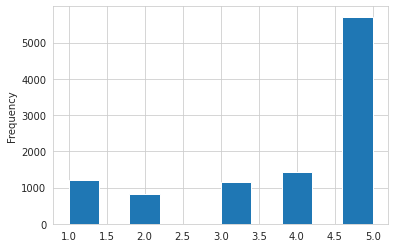

In [0]:
rent_data['city'].plot(kind='hist')

In [0]:
bln_rent_data = rent_data.groupby('city')
bln_rent_data = pd.DataFrame(bln_rent_data.apply(lambda x: x.sample(bln_rent_data.size().min()).reset_index(drop=True)))

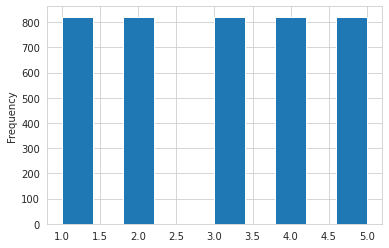

In [0]:
bln_rent_data['city'].plot(kind='hist')

In [0]:
bln_rent_target = bln_rent_data.iloc[:,0]
bln_rent_attr = bln_rent_data.iloc[:,1:]

scaled_bln_rent_attr = scale(bln_rent_attr, with_mean=True)

In [0]:
best = 0
best_acc = 0

for exp in experimentos:
  acc = evaluate_model(exp, scaled_bln_rent_attr, bln_rent_target)
  #print(exp +" accuracy is "+ str(acc))

  if(acc > best_acc):
    best = exp
    best_acc = acc

print("\nThe best classifier was "+best+" with "+str(best_acc)+" accuracy")

Evaluating Random Forest120ent
Accuracy: 61.51%
Precision: 61.82%
Recall: 61.51%
F1: 61.52%
Evaluating MLP hidden (100,10)
Accuracy: 70.75%
Precision: 71.58%
Recall: 70.75%
F1: 70.74%
Evaluating MLP hidden (100,20)
Accuracy: 70.83%
Precision: 71.25%
Recall: 70.83%
F1: 70.80%

The best classifier was MLP hidden (100,20) with 0.7082725060827252 accuracy


Pois é...

A acurácia dos modelos diminuiu com o balanceamento do dataset, mas não absurdamente. E podemos ver que as outras métricas aumentaram, tendo um modelo mais conciso.

Fim. Ou será que não...

Bacana, temos um modelo de classificação de casas para aluguel nessas 5 cidades, com uma boa eficácia. É interessante, mas eu particularmente, não encontrei uma aplicação útil onde isso pode ser utilizado. Bora fazer algo mais prático?

E se utilizarmos os atributos da residência, para estimar um valor de aluguel? Assim, um proprietário poderia descobrir por quanto alugar seu imóvel.

Primeira coisa, vamos ver quais atributos são interessantes para nosso modelo.

Cidade, área, quartos, banheiros, vagas, andar, animais e mobília são úteis.

Os outros atributos são valores que compõe o total, porém faz sentido utilizar o valor de condomínio, IPTU e seguro de incêncio para determinar o valor do aluguel. Portanto, só não usaremos o total, pois isso depende diretamente do que queremos estimar.

Depois, vamos testar com os atributos das cidades que buscamos.

In [0]:
rent_data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,5,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,5,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,3,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,3,51,2,1,0,2,1,0,270,1112,22,17,1421
4,5,25,1,1,0,1,0,0,0,800,25,11,836


In [0]:
house_feat = rent_data[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture']]
house_feat_cost = rent_data[['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 
                                      'animal', 'furniture', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)']]
house_rent = rent_data['rent amount (R$)']
house_total = rent_data['total (R$)']

scaled_house_feat = scale(house_feat, with_mean=True)
scaled_house_feat_cost = scale(house_feat_cost, with_mean=True)

In [0]:
house_feat_cost.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$)
0,5,70,2,1,1,7,1,1,2065,211,42
1,5,320,4,4,0,20,1,0,1200,1750,63
2,3,80,1,1,1,6,1,0,1000,0,41
3,3,51,2,1,0,2,1,0,270,22,17
4,5,25,1,1,0,1,0,0,0,25,11


In [0]:
from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import train_test_split

def estimate_model(model, X, y):
  print("Estimating "+model)
  nsplits = 10
  kfold = StratifiedKFold(n_splits=nsplits)

  mse_sum = 0

  for train_index, test_index in kfold.split(X, y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    regressores[model].fit(X_train, y_train)
    
    pred = regressores[model].predict(X_test)

    mse = mean_squared_error(y_test, pred)
    mse_sum = mse_sum + mse

  print("MSE: " + str(mse_sum/nsplits))
  
  return mse_sum/nsplits

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def estimate_model_nofolds(model, X, y):
  print("Estimating "+model)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    
  regressores[model].fit(X_train, y_train)
    
  pred = regressores[model].predict(X_test)

  mse = mean_squared_error(y_test, pred)

  print("MSE: " + str(mse))
  
  return mse

In [0]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import PassiveAggressiveRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

regressores = {
    #"Random Forest": RandomForestRegressor(), 
    #"KNeighbors": KNeighborsRegressor(), 
    #"SVR": SVR(),
    #"PassiveAggressive": PassiveAggressiveRegressor(),
    #"Linear": LinearRegression(),
    #"DecisionTree": DecisionTreeRegressor(),
    #"GradientBoosting": GradientBoostingRegressor(),
    "GradientBoosting": GradientBoostingRegressor(learning_rate=0.18, n_estimators=120),
    #"MLP": MLPRegressor(), #0.79
}

In [0]:
best = 0
best_mse = 5000000

for reg in regressores:
  mse = estimate_model(reg, scaled_house_feat_cost, house_rent)
  #122368 no folds with house_feat_cost and house_rent
  #102523 folds with house_feat_cost and house_rent
  #4414637 no folds with house_feat and house_rent
  #164898 no folds with house_feat_cost and house_total
  #164898 no folds with house_feat_cost and house_total
  #122304 no folds with scaled_house_feat_cost and house_rent
  #174977 no folds with scaled_house_feat_cost and house_total
  #4414548 no folds with scaled_house_feat and house_rent
  #100106 folds with scaled_house_feat_cost and house_rent

  if(mse < best_mse):
    best = reg
    best_mse = mse

print("\nThe best regressor was "+best+" with MSE of "+str(best_mse))

Estimating GradientBoosting5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


MSE: 98013.22026118182

The best regressor was GradientBoosting5 with MSE of 98013.22026118182


In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_house_feat_cost, house_rent, test_size=0.20, random_state=0)
#scaled_house_feat_cost, house_rent
regressores['GradientBoosting'].fit(X_train, y_train)
pred = regressores['GradientBoosting'].predict(X_test)

In [0]:
y_test.reset_index(drop=True, inplace=True)
print("Predict    Value")
for i in range(0, 30):

  print(str(int(round(pred[i]))) +"       "+ str(y_test[i]))
  #print(y_test[5])

Predict    Value
4085       4000
1147       1090
15017       15000
3781       3800
4327       4350
15041       15000
812       700
1026       1000
1898       1900
1200       1200
706       750
1208       1584
2584       2500
2852       2900
677       550
863       900
1257       1300
1246       1300
992       1000
7667       7609
4434       4200
3743       3870
677       800
2872       2896
2097       2000
14898       15000
1228       1250
2025       2060
5426       5556
966       1000
